# Assignment 2-3 optional
author: Dominika Maciąg 

# Bank Customer Churn Dataset
Data set that I am using comes from kaggle website: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download

## Information about dataset: 
This dataset is for ABC Multistate bank with following columns:

1. customer_id, unused variable.
2. credit_score, used as input.
3. country, used as input.
3. gender, used as input.
4. age, used as input.
5. tenure, used as input.
6. balance, used as input.
7. products_number, used as input.
8. credit_card, used as input.
9. active_member, used as input.
10. estimated_salary, used as input.
11. churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

bank_df = pd.read_csv('Bank Customer Churn Prediction.csv')
bank_df.head(n=5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exercise 1
a) Create and train simple regression model.\
b) Evaluate and visualise created model. \
c) Create and plot higher order polynomial regression models.

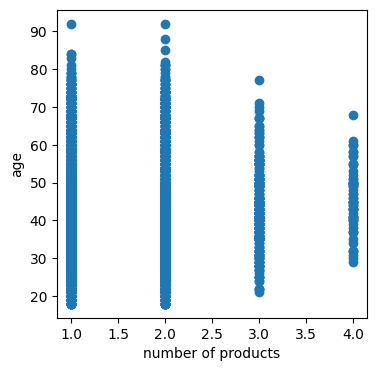

In [2]:
# firstly lets see relationship between data on scatter plot

x_axis = bank_df.loc[:,"products_number"]
y_axis = bank_df.loc[:,"age"]

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.scatter(x_axis,y_axis)
plt.xlabel("number of products")
plt.ylabel("age")
plt.show()

## Summary:
As we can see for one and two products the ownership is evenly spread in all age groups. 
Three products are owned by age group from 20 to 70 years old.
Ownin four products is mostly visible in the age group 30 - 60 years old. \
We can assume that younger people tend to have more products that this bank offers.

In [3]:
#a) Create and train simple regression model of age to products number.

X = bank_df.age.values.reshape(-1,1)[:1000]
y = bank_df.products_number.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)

LinearRegression(n_jobs=1)

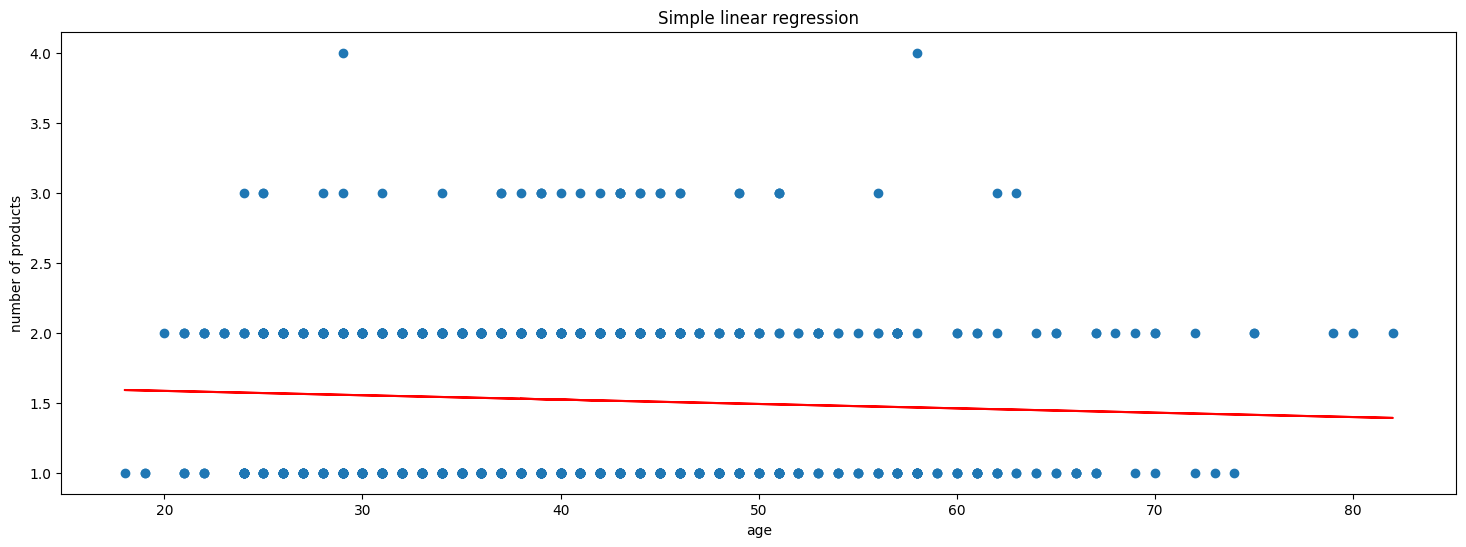

Coefficients:  [-0.00311589]
Intercept:  1.646856225752984
Score:  0.003137884508195965
Mean squared error equals: 0.3283414592901129


In [4]:
#b) Evaluate and visualise created model

y_pred = model.predict(X)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

## Summary: 
As we can observe the relationship between two variables is not very strong, but still linear regression predicted that the older are bank customers the less products they have.

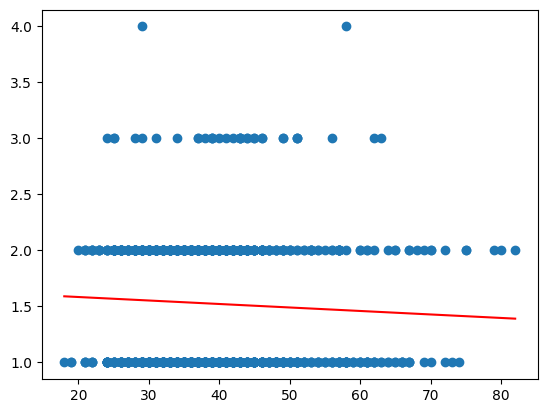

error:  0.3283414592901129


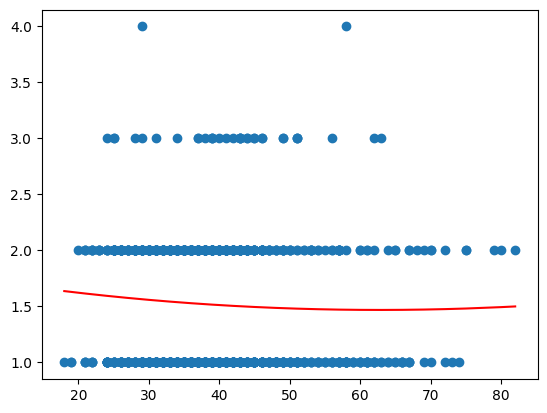

error:  0.3281622153482474


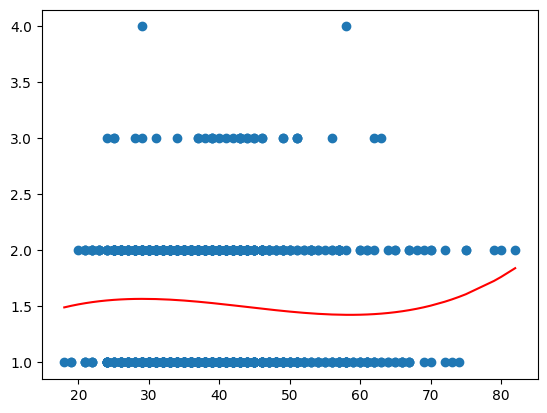

error:  0.3273153955729392


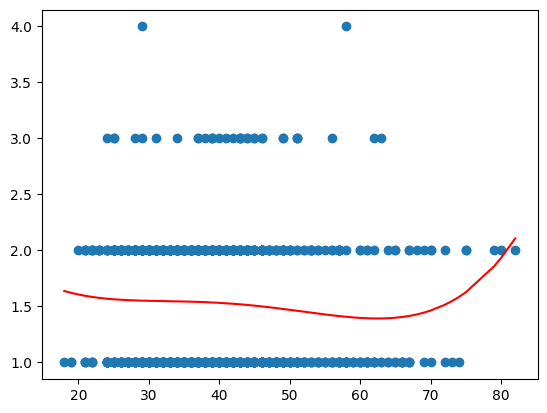

error:  0.3268599607492699


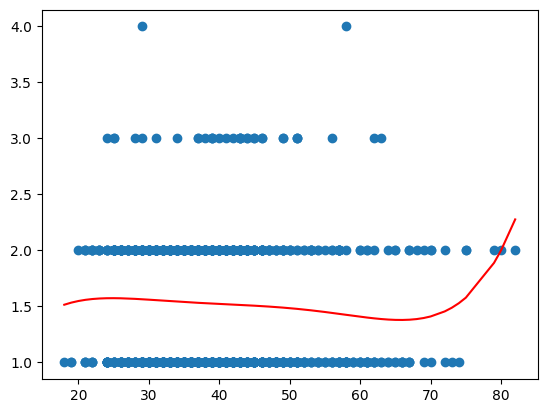

error:  0.32665324942230894


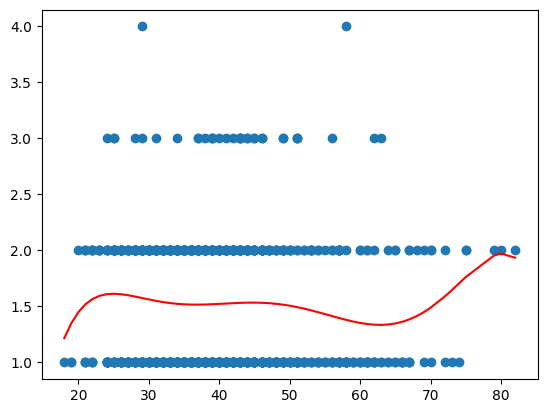

error:  0.32568629653674813


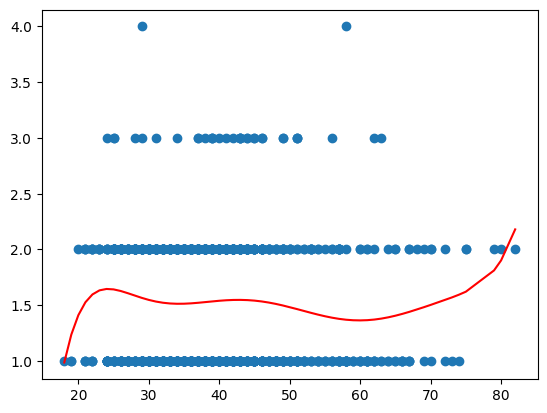

error:  0.3251507152653368


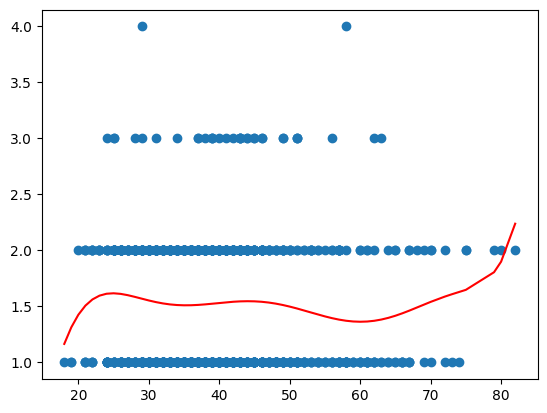

error:  0.32555169160836817


In [5]:
#c) Create and plot higher order polynomial regression models.

X_sorted = X[X[:, 0].argsort()]
Y_sorted = y[X[:, 0].argsort()]
array = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X_sorted)

    # Visualizing the Polymonial Regression results
    pol = LinearRegression()
    pol.fit(X_order, Y_sorted)
    plt.scatter(X, y)
    Y = pol.predict(poly.fit_transform(X_sorted))
    plt.plot(X_sorted,Y, color="red")
    plt.show()
    
    ##### errors #####
    pred = pol.predict(poly.fit_transform(X))
    array.insert(order, mean_squared_error(y, pred)) 
    print("error: ", mean_squared_error(y, pred))


## Summary
As we know polymonial regression is better at fitting data than linear regression. It is especially visible when we use higher order polynomial regression models. 

## Model performance
To create plot of model performance I used array to store error values that I calculated for each degree.
There are different methods that are used to assess the quality of a regression model.
The one that I used for each degree was - MSE (Mean Squared Error). 
The lower the MSE the better.

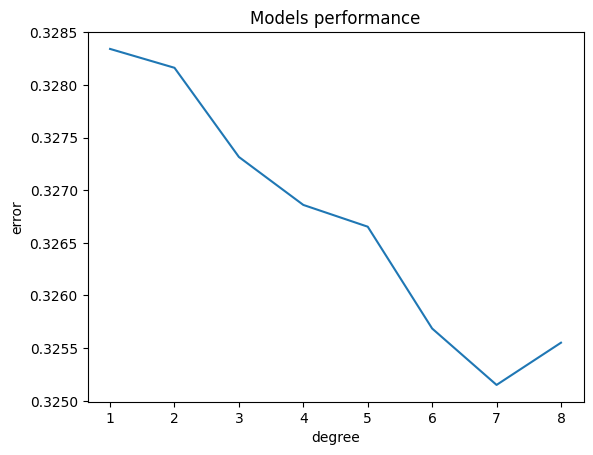

In [6]:
degree = [1,2,3,4,5,6,7,8]
plt.plot(degree,array)
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.show()

## Summary:
Error is smallest for 7th degree.

# Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data. \
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

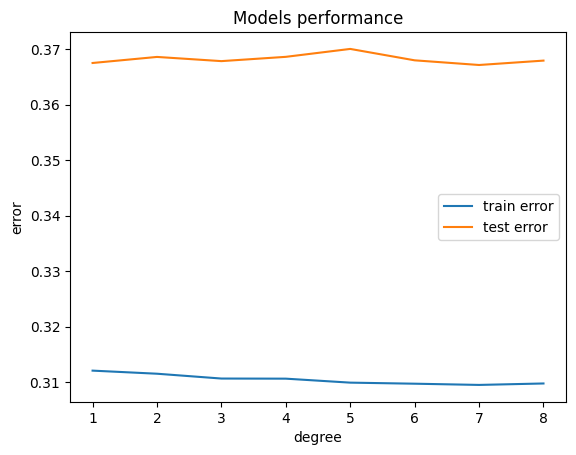

In [7]:
#a)

array_train = []
array_test = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    pol = LinearRegression()
    pol.fit(X_train, y_train)
    
    pol2 = LinearRegression()
    pol2.fit(X_test, y_test)
    
    ##### errors #####
    pred1 = pol.predict(X_train)
    array_train.insert(order, mean_squared_error(y_train, pred1)) 
    # print("error: ", mean_squared_error(y_train, pred1))
    
    pred2 = pol.predict(X_test)
    array_test.insert(order, mean_squared_error(y_test, pred2)) 
    # print("error2: ", mean_squared_error(y_test, pred2))

plt.plot(degree,array_train, label="train error")
plt.plot(degree,array_test, label="test error")
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.legend()
plt.show()

## Summary
After we separated data to test data and trained data we can compare their errors on the chart displayed above. We can observe that trained data is more accurate than test data since it doesn't have such high error value. 

# Excercise 3
a) Train model to predict age for a given number of products. Plot predictions. \
b) Apply more features and propose better model for predicting the age. Try to beat proposed one.

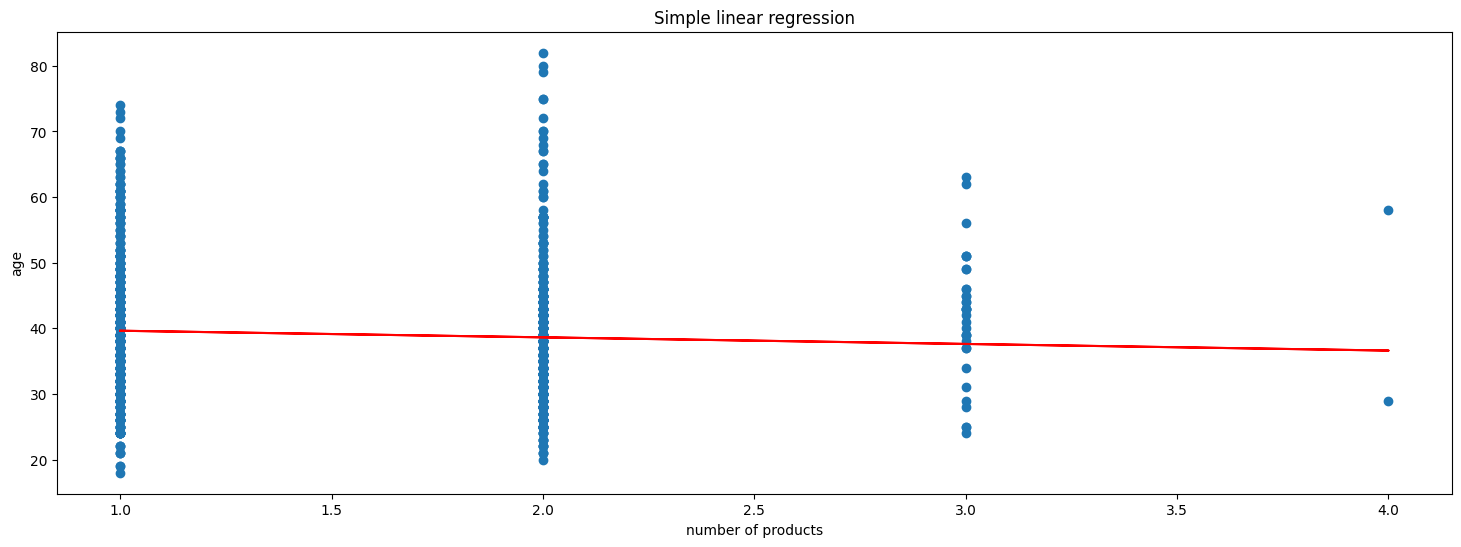

Coefficients:  [-1.00705882]
Intercept:  40.64376470588235
Score:  0.003137884508196187
Mean squared error equals: 106.12029458823528


In [10]:
#a)

X = bank_df.products_number.values.reshape(-1,1)[:1000]
y = bank_df.age.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)
y_pred = model.predict(X)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("number of products");
plt.ylabel("age");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

In [13]:
#b) Let's propose model, which uses age, credit score, balance,estimated salary and all of their interactions up to third degree

X = bank_df[['age', 'credit_score', 'balance', 'estimated_salary']].values.reshape(-1,4)
y = bank_df.products_number.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 0.30981539912609407


In [18]:
#  Method that I propose for my data is to use trained data for the predictions and for calculation of MSE 

X = bank_df[['age', 'credit_score', 'balance', 'estimated_salary']].values.reshape(-1,4)
y = bank_df.products_number.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_train) 
print("Mean squared error equals: {0}".format(mean_squared_error(y_train, y_pred)))

Mean squared error equals: 0.29352090543485326


# Assignment 3 with my dataset

## 1. Linear Regression. A bit of formalism
Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, age is a feature, products number is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [20]:
X = bank_df.age.values.reshape(-1,1)[:100]
y = bank_df.products_number.values.reshape(-1,1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100, 1)


# Exercise 1
a) Create functions predict(b, X) and cost(y_pred, y_true). All inputs should be numpy arrays (take care of dimension scalability!) \
b) For our data X,y, plot cost as the function of b (which is one dimensional vector). Plot the line with best slope among evaluated with cost function.

In [21]:
#a)
def predict(b, X):
    # return matrix multiplication
    return np.matmul(X,b)

def cost(y_pred, y_true):
    # mean squared error without sklearn using only numpy
    subY = y_pred - y_true
    absY = abs(subY)
    powY = pow(absY,2)
    return powY.mean()



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


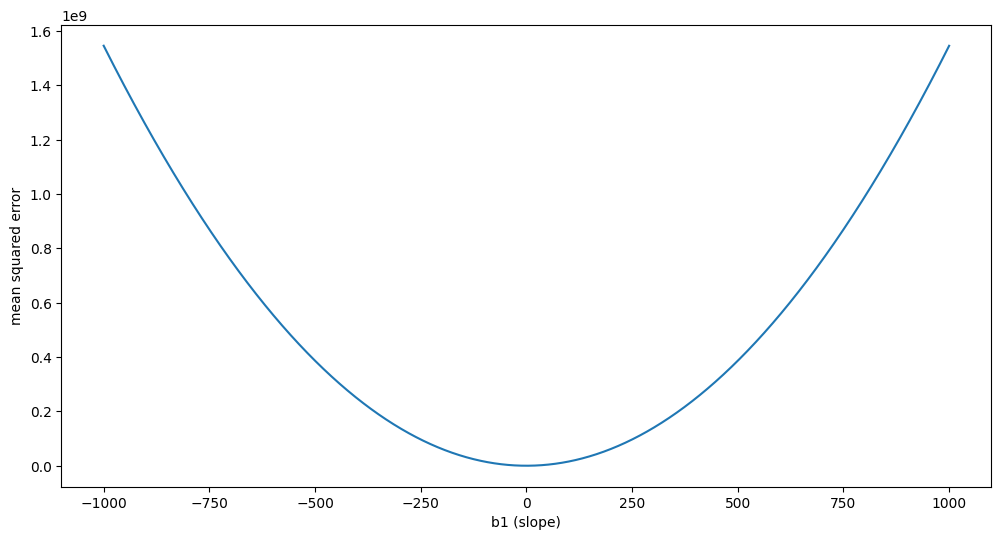

In [22]:
#b)
b1 = list(range(-1000, 1001))
b1_re = np.array(b1).reshape(-1,1)
mse = []*2001

for i in range (2001):
    mse.append(cost(predict(b1_re[i],X),y))
    
# print(mse)
# print("\n")
# print(b1)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel("b1 (slope)");
plt.ylabel("mean squared error");
plt.plot(b1,mse)

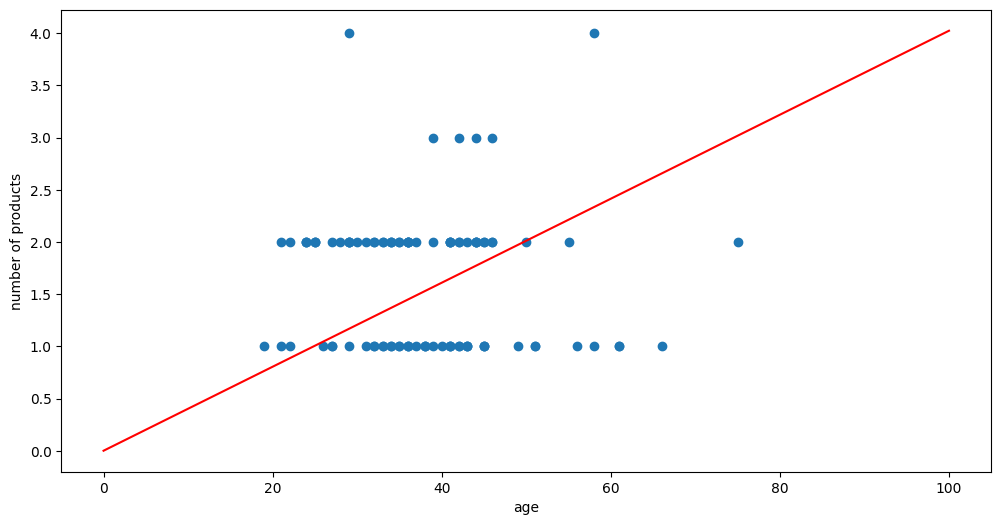

In [64]:
import math
min_er = cost(predict([[0]], X),y)
dokladnosc = 10000
min_b = 0

for i in range (dokladnosc):
    b = math.tan((math.pi*i) / (2*dokladnosc))
    if cost(predict([[b]], X),y)<min_er:
        min_er = cost(predict([[b]], X),y)
        min_b = b
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel("age");
plt.ylabel("number of products");
plt.scatter(X, y)
plt.plot([0,100], [0,100*min_b],color="red")

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [23]:
#a) 
X = np.c_[X,np.ones((100,1))]
# print(X)

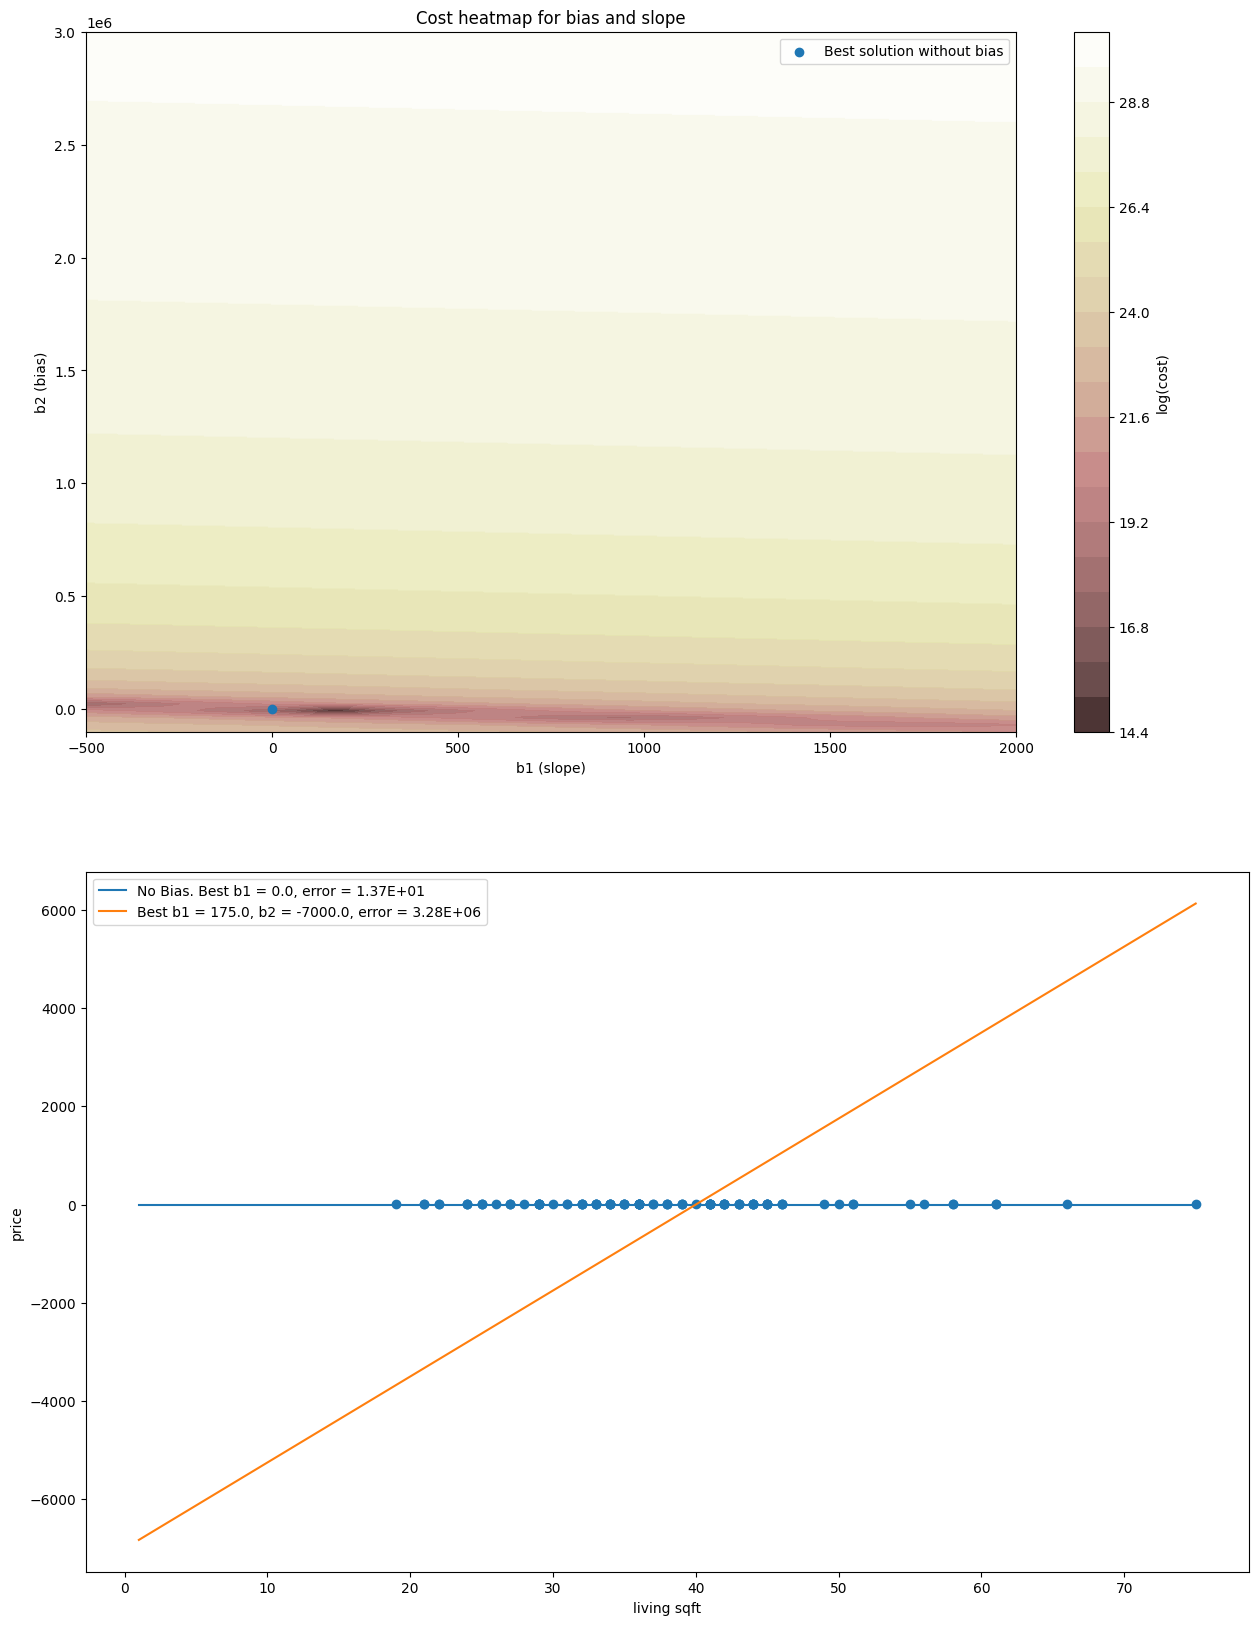

In [29]:
# y_shifted = y+1e6
y_shifted = y+2

#No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]
cost_arr = [cost(predict(np.array([[b]]), X[:,0][:,np.newaxis]), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]


#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 2000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e5, 3e6, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y_shifted)
plt.xlabel("living sqft")
plt.ylabel("price")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [94]:
# a)
X = bank_df.age.values.reshape(-1,1)[:1000]
y = bank_df.products_number.values.reshape(-1)[:1000]

def standardize(X):
    return ((X-np.mean(X,axis=0))/np.std(X,axis=0))

def standardize2(X):
    tab = [ ((X-np.mean(X,axis=0))/np.std(X,axis=0))  ,  np.mean(X,axis=0)  , np.std(X,axis=0)]
    return tab

# b)
def destandardize(X, means, sds):
    return (X * sds)+means

#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]
standardize2(W)


[array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995])]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

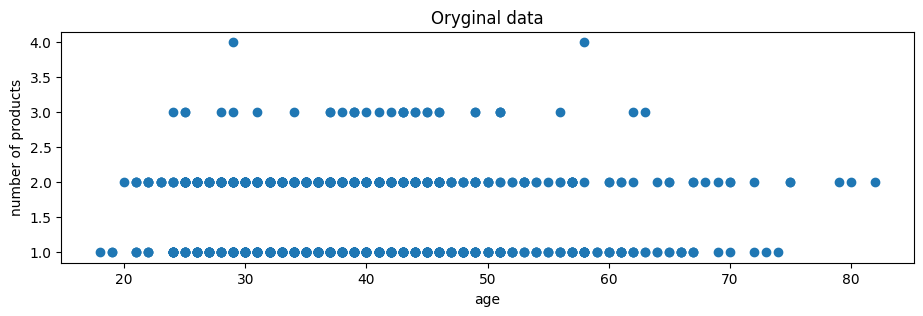

In [96]:
# c) Plot original  𝑋,𝑦  data. Then plot it after standardization. Then plot it after destandardisation.

# oryginal data
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Oryginal data")
plt.scatter(X, y)

# standardized data
X_st = standardize(X[:,0])
y_st = standardize(y[:,0])
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Standardized data")
plt.scatter(X_st, y_st)

# destandardized data
y_mean = np.mean(y, axis=1)
y_sds = np.std(y, axis=1)
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Destandardized data")
plt.scatter(X[:,0], destandardize(y_st,y_mean,y_sds))

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *age* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *age* and *balance*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [99]:
# a)

def gradient(b, X, y):
    subxb = np.matmul(X,b)
    sub = np.matmul((2*(X.transpose())), (subxb-y))
    return sub / len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b,X,y)*lr

#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


In [104]:
# b)
X=standardize(X)
y_shifted=standardize(y_shifted)
X_1 = np.c_[X,np.ones((1000,1))]
b = [[3],[2]]
lr = 0.2
arr_b = []

for i in range(10):
    b = gradient_descent_step(b, X_1, y_shifted, lr)
    arr_b.append(b) 
    
#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_1) , y_shifted)

plt.figure(figsize=(15,20)) 
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")
print(arr_b[3][0][0])
print(best_b1)
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()

for i in range (10):
    plt.scatter(arr_b[i][0][0], arr_b[i][1][0],color = [[0.09*i,0,0]])
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,1) (100,1) 